<a href="https://colab.research.google.com/github/AkiraNom/data-analysis-notebook/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch data from the SQL database using sqlite3

In [6]:
# import sqlite3

# # connect to the sql database
# con = sqlite3.connect('database.sqlite')

# cur = con.cursor()

# try:
#   cur.execute("SELECT * FROM Reviews LIMIT 10")

#   print('Connected to the database successfully')

#   # fatch the data in a list
#   data_list = cur.fetchall()

#   # get column names
#   names = list(map(lambda x: x[0], cur.description))

#   # create a dataframe
#   # display(pd.DataFrame(data_list, columns=names).head())


# except sqlite3.OperationalError:
#     print('No such tables in the databse')


# # data query using pandas
# df_raw = pd.read_sql_query("SELECT * FROM Reviews", con)

# # check if the data is stored in the dataframe
# display(df_raw.head())

# # close the connection
# con.close()

Connected to the database successfully


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
# read the data from csv
df_raw = pd.read_csv('Reveiws.csv')

In [25]:
print(df_raw.shape)
print(df_raw.info())

(568454, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  object
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(4), object(6)
memory usage: 43.4+ MB
None


In [10]:
# Nan count in each column
df_raw.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [26]:
# check unique values in each column
df_raw.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218418
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295744
Text                      393579
dtype: int64

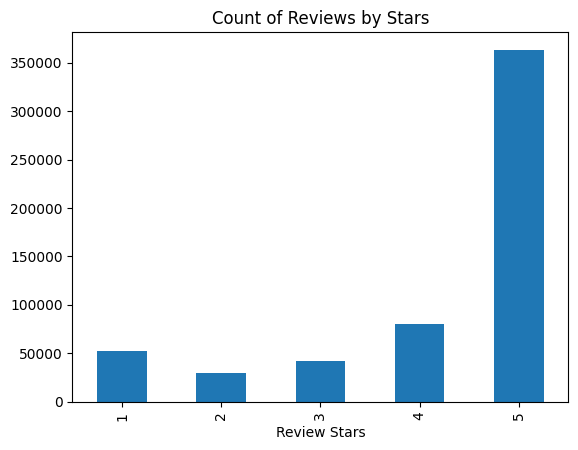

In [61]:
ax = df_raw['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars')
ax.set_xlabel('Review Stars')
plt.show()

# Method 1: VANDER Sentiment Scoring

Natural Language Toolkit (NLTK) is a leading platform for building Python programs to work with human language data.

Using 'SentimentIntensityAnalyzer' to compute the negative/neutral/positive scores of the text.

* "Bag of words" approach:
  1. remove stop words
  2. each word is scored and combined to a toal score  


In [31]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')
nltk.download('movie_reviews')
nltk.download('punkt')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [35]:
# example with positive words
print(sia.polarity_scores('I am so happy!'))

# with negative words
print(sia.polarity_scores('This is the worst thing ever.'))

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}
{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}


In [36]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df_raw.iterrows(), total=len(df_raw)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [53]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
# merge with raw data
vaders = vaders.merge(df_raw, how='left')

In [54]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


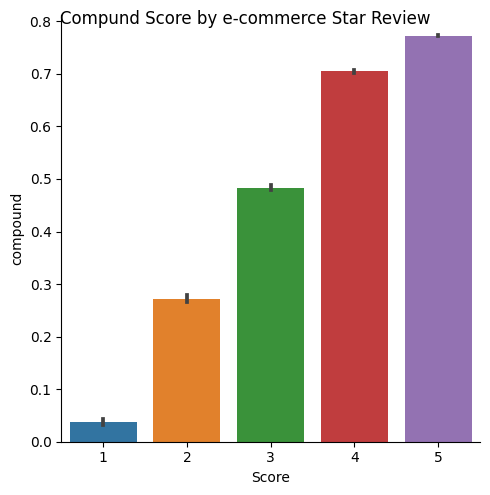

In [59]:
# plot mean compond score in each review score
g = sns.catplot(data=vaders, x='Score', y='compound', kind='bar')
g.fig.suptitle('Compund Score by e-commerce Star Review')
plt.show()

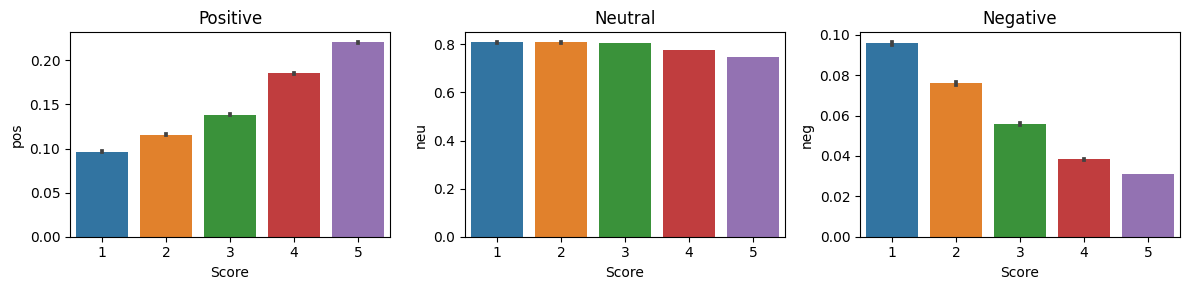

In [60]:
# visualize pos/neu/neg socres in each star score
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Method 2: RoBERTa Pretrained Model

A robustly optimised BERT pre-trained approach (RoBERTa) for NLP classification tasks.

In [62]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

ModuleNotFoundError: ignored